### About the Data

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score

In [2]:
#Reading the dataset
df = pd.read_csv('RTA Dataset.csv')

In [3]:
df.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
#Checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
#checking for null values
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [6]:
print(31-15) #Their are 16 columns with null values present

16


In [7]:
#describing the data for numerical data
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [8]:
# Describing the data including categorical columns
df.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


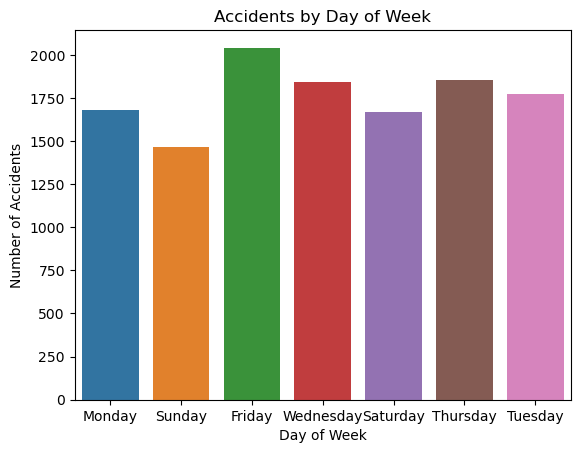

In [9]:
sns.countplot(x='Day_of_week', data=df)
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

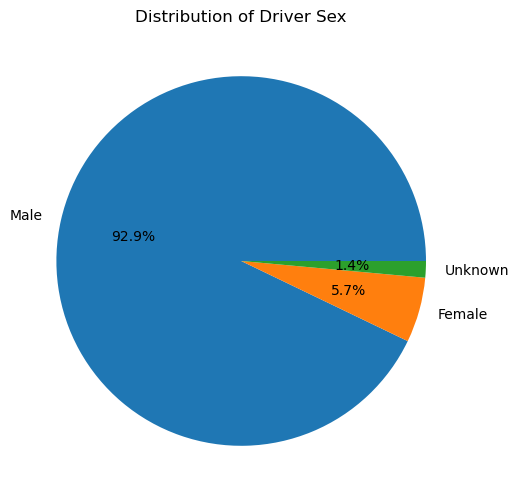

In [10]:
plt.figure(figsize=(8, 6))
df['Sex_of_driver'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Driver Sex')
plt.ylabel('')
plt.show()

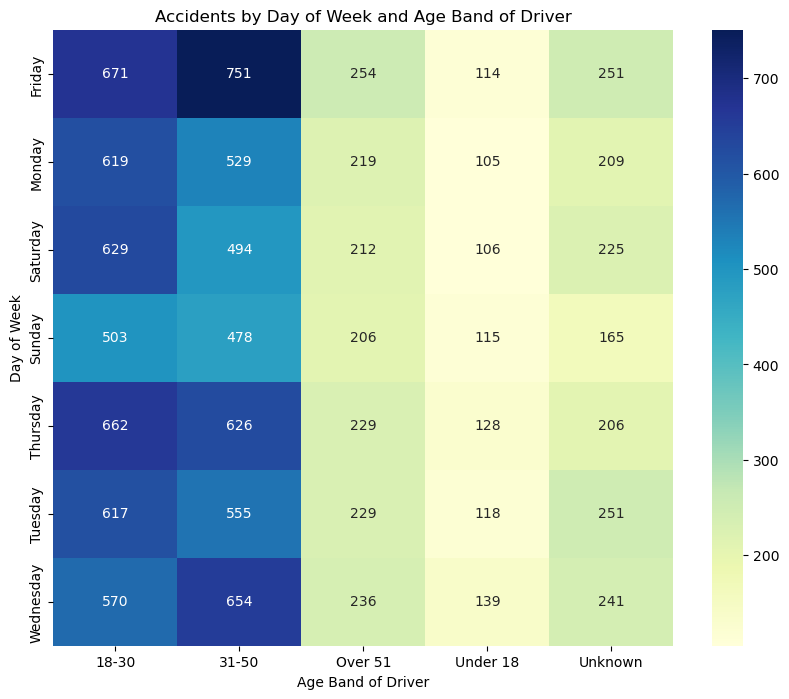

In [11]:
plt.figure(figsize=(10, 8))
heatmap_data = df.groupby(['Day_of_week', 'Age_band_of_driver']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Accidents by Day of Week and Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Day of Week')
plt.show()

In [12]:
#Checking for unique/ different type of values present in "Educational_level" column
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [13]:
#Calculating the mode of "Educational_level"
ELM=df['Educational_level'].mode()
ELM

0    Junior high school
Name: Educational_level, dtype: object

In [14]:
#Calculating the mode of "Vehicle_driver_relation"
VDRM = df['Vehicle_driver_relation'].mode()
VDRM

0    Employee
Name: Vehicle_driver_relation, dtype: object

In [15]:
#Calculating the mode of "Driving_experience"
DE = df['Driving_experience'].mode()
DE

0    5-10yr
Name: Driving_experience, dtype: object

In [16]:
print("The percentage of data that is null:")
df.isnull().sum()/len(df)*100

The percentage of data that is null:


Time                            0.000000
Day_of_week                     0.000000
Age_band_of_driver              0.000000
Sex_of_driver                   0.000000
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Driving_experience              6.731082
Type_of_vehicle                 7.713543
Owner_of_vehicle                3.913608
Service_year_of_vehicle        31.893472
Defect_of_vehicle              35.945112
Area_accident_occured           1.940565
Lanes_or_Medians                3.126015
Road_allignment                 1.152972
Types_of_Junction               7.202014
Road_surface_type               1.396557
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Type_of_collision               1.258525
Number_of_vehicles_involved     0.000000
Number_of_casualties            0.000000
Vehicle_movement                2.500812
Casualty_class                  0.000000
Sex_of_casualty 

In [17]:
# created an function to replace the null values with mode value
def null_value_treatment(col):
    for i in df:
        if df[i].dtypes=='object':
            df[i].fillna(df[i].mode()[0],inplace=True)
        else:
            df[i].fillna(df[i].median(),inplace=True)

In [18]:
for i in df:
    null_value_treatment(i)

In [19]:
df.isnull().sum()/len(df)*100

Time                           0.0
Day_of_week                    0.0
Age_band_of_driver             0.0
Sex_of_driver                  0.0
Educational_level              0.0
Vehicle_driver_relation        0.0
Driving_experience             0.0
Type_of_vehicle                0.0
Owner_of_vehicle               0.0
Service_year_of_vehicle        0.0
Defect_of_vehicle              0.0
Area_accident_occured          0.0
Lanes_or_Medians               0.0
Road_allignment                0.0
Types_of_Junction              0.0
Road_surface_type              0.0
Road_surface_conditions        0.0
Light_conditions               0.0
Weather_conditions             0.0
Type_of_collision              0.0
Number_of_vehicles_involved    0.0
Number_of_casualties           0.0
Vehicle_movement               0.0
Casualty_class                 0.0
Sex_of_casualty                0.0
Age_band_of_casualty           0.0
Casualty_severity              0.0
Work_of_casuality              0.0
Fitness_of_casuality

In [20]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7716,11:10:00,Thursday,Unknown,Male,Junior high school,Owner,5-10yr,Public (> 45 seats),Owner,Unknown,...,Other,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
11313,17:40:00,Sunday,Over 51,Male,Junior high school,Owner,5-10yr,Lorry (41?100Q),Owner,Unknown,...,Reversing,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
36,20:30:00,Friday,18-30,Male,Above high school,Employee,1-2yr,Taxi,Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
5185,18:11:00,Thursday,18-30,Male,Junior high school,Owner,5-10yr,Automobile,Owner,Unknown,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Overtaking,Slight Injury
2133,1:32:00,Monday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
4016,8:56:00,Saturday,Under 18,Male,High school,Employee,Above 10yr,Other,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
526,13:28:00,Monday,18-30,Male,Junior high school,Owner,Above 10yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
4410,16:25:00,Monday,18-30,Male,Unknown,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Serious Injury
7672,6:50:00,Monday,Under 18,Male,Junior high school,Employee,2-5yr,Taxi,Governmental,2-5yrs,...,Going straight,Pedestrian,Female,Over 51,3,Driver,Normal,"In carriageway, statioNot a Pedestrianry - not...",Driving to the left,Slight Injury
7827,12:51:00,Wednesday,Over 51,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury


After filling the null values with mode, their are some columns that has "na" and "unknown" present.

In [21]:
df['Age_band_of_casualty'].unique()

array(['na', '31-50', '18-30', 'Under 18', 'Over 51', '5'], dtype=object)

In [22]:
df['Service_year_of_vehicle'].unique()

array(['Above 10yr', '5-10yrs', 'Unknown', '1-2yr', '2-5yrs', 'Below 1yr'],
      dtype=object)

In [23]:
df['Service_year_of_vehicle'].mode()[0]

'Unknown'

In [24]:
df['Age_band_of_casualty'].mode()[0]

'na'

##### As we can se that the mode value of that column is null

In [25]:
#Checking the correlation
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_16032\18339900.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


###### As we can see that "Number_of_vehicles_involved" has correlation with "Number_of_casualties" of 0.2134. A correlation of 0.213 is not particularly strong, but it’s not necessarily “bad.

In [26]:
df.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_16032\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Number_of_vehicles_involved    1.323454
Number_of_casualties           2.344769
dtype: float64

##### A skewness value of 1.3234, 2.344 indicates that the data is positively skewed (right-skewed) and -3.833 indicates that the data is left skewed

In [27]:
# Converting the categorical data into numerical data
LE = LabelEncoder()

In [28]:
def Categorical_numerical(col):
    for i in df:
        df[col] = LE.fit_transform(df[col])

In [29]:
for i in df:
    Categorical_numerical(i)

In [30]:
df.head(4)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,420,1,0,1,0,0,0,0,3,3,...,2,3,2,5,3,0,2,5,9,2
1,420,1,1,1,4,0,3,11,3,2,...,2,3,2,5,3,0,2,5,16,2
2,420,1,0,1,4,0,0,5,3,5,...,2,0,1,1,2,0,2,5,0,1
3,594,3,0,1,4,0,2,11,0,5,...,2,2,0,0,2,0,2,5,1,2


In [31]:
#treating the outlier with zscore
from scipy.stats import zscore
def outlier_treatment(col):
    zscore1=(abs(zscore(df[col])))
    outlier=zscore1>+3
    median=df[col].median()
    df.loc[outlier,col]=median

In [32]:
for i in df:
    outlier_treatment(i)

### Training the Model

In [33]:
X = df.drop('Accident_severity',axis=1)

In [34]:
y = df.Accident_severity

## Balancing the data using smote

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [36]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=0)

## Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [39]:
LR.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
pred = LR.predict(x_test)

### Evaluating the Model

In [41]:
accuracy_score(y_test,pred)*100

85.86217395717041

In [43]:
predict = LR.predict(x_test)

In [44]:
confusion_matrix(y_test,predict)

array([[   0, 1393],
       [   0, 8460]], dtype=int64)

## DecisionTreeClassifier()

In [45]:
#Decision Tree classifier
DTC = DecisionTreeClassifier()

In [46]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred = DTC.predict(x_test)

In [48]:
y_pred

array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

### Evaluating the model

In [49]:
accuracy_score(y_test,y_pred)*100

75.55059372779864

In [50]:
f1_score(y_test,y_pred,average='weighted')*100

76.20773383900621

In [51]:
confusion_matrix(y_test,y_pred)

array([[ 286, 1107],
       [1302, 7158]], dtype=int64)

## K NEIGHBORS CLASSIFIER

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
KNN = KNeighborsClassifier(n_neighbors=25)

In [54]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [55]:
knn_pred=KNN.predict(x_test)

In [56]:
y_test

8348    2
5386    2
1783    2
7077    2
5437    2
       ..
9012    2
886     2
5878    2
5876    2
6558    2
Name: Accident_severity, Length: 9853, dtype: int64

### Evaluating the Model

In [57]:
accuracy_score(y_test,knn_pred)*100

85.86217395717041

In [58]:
f1_score(y_test,knn_pred,average='weighted')*100

79.33096616367189

In [59]:
confusion_matrix(y_test,knn_pred)

array([[   0, 1393],
       [   0, 8460]], dtype=int64)

In [60]:
print("The true predictions are:")
8460+0

The true predictions are:


8460

In [61]:
print("The False predictions are:")
1393+0

The False predictions are:


1393

In [62]:
KNN.score(x_train,y_train)

0.857896873731222

In [63]:
KNN.score(x_test,y_test)

0.8586217395717041

# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
model_pred = RFC.predict(x_test)

In [67]:
y_test

8348    2
5386    2
1783    2
7077    2
5437    2
       ..
9012    2
886     2
5878    2
5876    2
6558    2
Name: Accident_severity, Length: 9853, dtype: int64

### Evaluating the model

In [68]:
accuracy_score(y_test,model_pred)*100

85.87232315030955

In [69]:
confusion_matrix(y_test,model_pred)

array([[   5, 1388],
       [   4, 8456]], dtype=int64)

In [70]:
print("The True predictions are:")
(4+845)

The True predictions are:


849

In [71]:
print("The False predictions are:")
2+1389

The False predictions are:


1391

In [72]:
precision = precision_score(y_test, model_pred)
recall = recall_score(y_test, model_pred)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.56
Recall: 0.00


In [73]:
f1_score(y_test,model_pred)*100

0.7132667617689015

## Conclusion

The analysis concludes with the following results:

Logistic Regression achieved an accuracy of approximately 85.86%.
Decision Tree Classifier had an accuracy of around 75.69%.
K-Nearest Neighbors (KNN) achieved an accuracy of 85.86%.
Random Forest Classifier had an accuracy of approximately 85.88%.
The models were evaluated based on accuracy, F1-score, and confusion matrices. 

Further fine-tuning and feature engineering may improve model performance. 